# Objectives
- Define 'tidy' data
- Describe the differences between Melt and Pivot
- Use melt and pivot to reshape data set into a format that is tidy
***
## Tidy Data
* each variable is a column
* each row is an observation
* each type of observational unit is a table

## Melt
- Why do we use `melt`?
    - To bring our data from wide form to long form and make it tidy
    - To make each row a single observation

## Pivot
- Why do we use `pivot`
    - To make each variable a column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reshaping - Melt
## Read and Manipulate

Read the following URL using Pandas `read_csv` function and assign it to the variable `house`. You can click the link and download the csv if you would like to. Inspect the first five lines.

https://files.zillowstatic.com/research/public_v2/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv


In [2]:
house = pd.read_csv('https://files.zillowstatic.com/research/public_v2/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
house.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,102001,0,United States,Country,NaN,106948.0,106975.0,107025.0,107151.0,107293.0,...,251561.0,252808.0,254322.0,256273.0,258554.0,261062.0,263778.0,266596.0,269440.0,272446.0
1,394913,1,"New York, NY",Msa,NY,187450.0,187013.0,186734.0,186202.0,185885.0,...,485001.0,486825.0,489253.0,492450.0,496604.0,501301.0,506351.0,511230.0,515876.0,520587.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,187876.0,188138.0,188158.0,188268.0,188241.0,...,706656.0,707939.0,712420.0,719736.0,727484.0,734401.0,741356.0,748439.0,755007.0,761635.0
3,394463,3,"Chicago, IL",Msa,IL,163550.0,163249.0,162853.0,162403.0,161800.0,...,246198.0,246846.0,248003.0,249557.0,251649.0,253978.0,256316.0,258626.0,260645.0,263185.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111771.0,111834.0,111994.0,112314.0,112658.0,...,258447.0,259779.0,261345.0,263147.0,265016.0,267474.0,269998.0,272884.0,275201.0,278259.0


It looks like we have some unnecessary columns `RegionID, SizeRank, RegionType`. Let's `drop` them from our DataFrame.

In [3]:
house = house.drop(['RegionID', 'SizeRank', 'RegionType'], axis=1)

Let's check out all of our columns using `info` and see if we have any null values to deal with. We have too many columns for pandas to display by default, so we must pass the value `True` to the parameter `verbose`, as well as the value `True` to the parameter `null_counts`.

In [4]:
house.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 304 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  912 non-null    object 
 1   StateName   911 non-null    object 
 2   1996-01-31  429 non-null    float64
 3   1996-02-29  431 non-null    float64
 4   1996-03-31  432 non-null    float64
 5   1996-04-30  432 non-null    float64
 6   1996-05-31  436 non-null    float64
 7   1996-06-30  437 non-null    float64
 8   1996-07-31  438 non-null    float64
 9   1996-08-31  438 non-null    float64
 10  1996-09-30  439 non-null    float64
 11  1996-10-31  439 non-null    float64
 12  1996-11-30  440 non-null    float64
 13  1996-12-31  442 non-null    float64
 14  1997-01-31  449 non-null    float64
 15  1997-02-28  451 non-null    float64
 16  1997-03-31  451 non-null    float64
 17  1997-04-30  452 non-null    float64
 18  1997-05-31  454 non-null    float64
 19  1997-06-30  455 non-null    

Let's check out which `StateName` `isnull`.

In [5]:
house.loc[house.StateName.isnull()]

,RegionName,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,United States,NaN,106948.0,106975.0,107025.0,107151.0,107293.0,107462.0,107629.0,107840.0,...,251561.0,252808.0,254322.0,256273.0,258554.0,261062.0,263778.0,266596.0,269440.0,272446.0


It looks like the United States is missing a state name. We don't want to drop this data point, so let's fill the `StateName` with `'US'`.

In [6]:
house.StateName = house.StateName.fillna('US')
house.head()

,RegionName,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,United States,US,106948.0,106975.0,107025.0,107151.0,107293.0,107462.0,107629.0,107840.0,...,251561.0,252808.0,254322.0,256273.0,258554.0,261062.0,263778.0,266596.0,269440.0,272446.0
1,"New York, NY",NY,187450.0,187013.0,186734.0,186202.0,185885.0,185596.0,185419.0,185327.0,...,485001.0,486825.0,489253.0,492450.0,496604.0,501301.0,506351.0,511230.0,515876.0,520587.0
2,"Los Angeles-Long Beach-Anaheim, CA",CA,187876.0,188138.0,188158.0,188268.0,188241.0,188268.0,188370.0,188322.0,...,706656.0,707939.0,712420.0,719736.0,727484.0,734401.0,741356.0,748439.0,755007.0,761635.0
3,"Chicago, IL",IL,163550.0,163249.0,162853.0,162403.0,161800.0,161473.0,160997.0,161564.0,...,246198.0,246846.0,248003.0,249557.0,251649.0,253978.0,256316.0,258626.0,260645.0,263185.0
4,"Dallas-Fort Worth, TX",TX,111771.0,111834.0,111994.0,112314.0,112658.0,112906.0,113083.0,113303.0,...,258447.0,259779.0,261345.0,263147.0,265016.0,267474.0,269998.0,272884.0,275201.0,278259.0


In [7]:
house.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 304 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  912 non-null    object 
 1   StateName   912 non-null    object 
 2   1996-01-31  429 non-null    float64
 3   1996-02-29  431 non-null    float64
 4   1996-03-31  432 non-null    float64
 5   1996-04-30  432 non-null    float64
 6   1996-05-31  436 non-null    float64
 7   1996-06-30  437 non-null    float64
 8   1996-07-31  438 non-null    float64
 9   1996-08-31  438 non-null    float64
 10  1996-09-30  439 non-null    float64
 11  1996-10-31  439 non-null    float64
 12  1996-11-30  440 non-null    float64
 13  1996-12-31  442 non-null    float64
 14  1997-01-31  449 non-null    float64
 15  1997-02-28  451 non-null    float64
 16  1997-03-31  451 non-null    float64
 17  1997-04-30  452 non-null    float64
 18  1997-05-31  454 non-null    float64
 19  1997-06-30  455 non-null    

Let's find out why we have null values in a lot of our early data columns.

In [8]:
house.loc[house.isna().any(axis=1)]

,RegionName,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
33,"Indianapolis, IN",IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187081.0,188517.0,190219.0,192159.0,194112.0,196139.0,198319.0,200759.0,203136.0,205859.0
59,"Albuquerque, NM",NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,218704.0,220401.0,222518.0,224680.0,227178.0,229862.0,233047.0,236202.0,239556.0,243220.0
69,"Baton Rouge, LA",LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,192094.0,192328.0,192484.0,192885.0,193547.0,194236.0,195366.0,196081.0,196659.0,196737.0
71,"McAllen, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122047.0,122713.0,123440.0,124490.0,125595.0,127100.0,128559.0,129865.0,130895.0,131910.0
82,"Wichita, KS",KS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146680.0,147422.0,148388.0,149507.0,150954.0,152567.0,154390.0,156200.0,157926.0,159515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,"Vermillion, SD",SD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183305.0,183440.0,183618.0,184191.0,184988.0,186159.0,187826.0,189501.0,190971.0,192107.0
907,"Lamesa, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75109.0,75412.0,75692.0,76009.0,76365.0,76730.0,77340.0,78065.0,78850.0,79586.0
909,"Pecos, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134127.0,134988.0,135596.0,135610.0,134811.0,133591.0,132724.0,132514.0,132205.0,132278.0
910,"Vernon, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67870.0,67799.0,67797.0,67826.0,67927.0,67941.0,68048.0,68125.0,68357.0,68762.0


Since we will just be plotting, we can leave these as null. 

## Melt
Melt `house` with its reset index and leave the columns `RegionName` and `StateName` (parameter: `id_vars`), make a new column called `Date` for the values previously the column labels (parameter: `var_name`), and make a label `Price` for the values previously contained in the multiple `Date` columns (parameter: `value_name`). Assign this new, melted DataFrame to `house_tidy`.

In [9]:
house_tidy = house.melt(id_vars=['RegionName', 'StateName'], var_name = 'Date', value_name = 'Price')
house_tidy

,RegionName,StateName,Date,Price
0,United States,US,1996-01-31,106948.0
1,"New York, NY",NY,1996-01-31,187450.0
2,"Los Angeles-Long Beach-Anaheim, CA",CA,1996-01-31,187876.0
3,"Chicago, IL",IL,1996-01-31,163550.0
4,"Dallas-Fort Worth, TX",TX,1996-01-31,111771.0
...,...,...,...,...
275419,"Lamesa, TX",TX,2021-02-28,79586.0
275420,"Craig, CO",CO,2021-02-28,201299.0
275421,"Pecos, TX",TX,2021-02-28,132278.0
275422,"Vernon, TX",TX,2021-02-28,68762.0


Let's plot the house prices in Colorado over time.

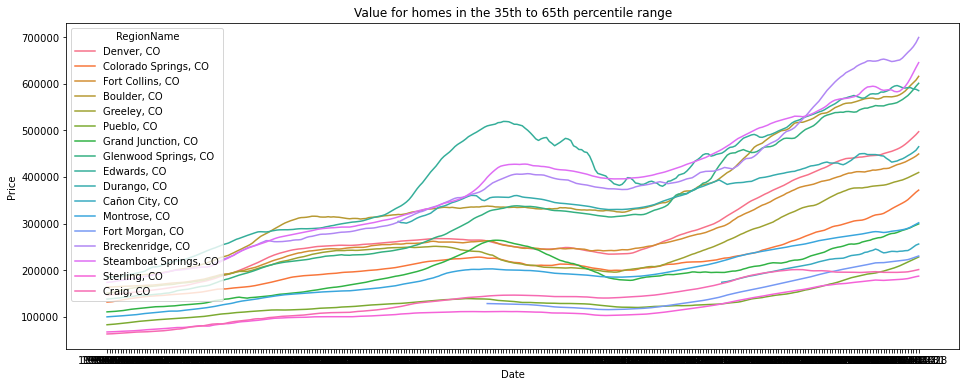

In [12]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=house_tidy.loc[house_tidy.StateName == 'CO'], x='Date', y='Price', hue='RegionName')
plt.title('Value for homes in the 35th to 65th percentile range')
plt.show()

# 2. Reshaping - Pivot & Pivot Table
***
## Pivot
- When should we use `pivot`?
    - to make each variable a column
    - when there is **at most** one observation for each unique combination of 2 columns

## Pivot Table
- When should we use `pivot_table`?
    - to make each variable a column
    - when there are more than one observation for each unique combination of 2 columns

## Read

In [13]:
url = 'http://bit.ly/2cLzoxH'
df = pd.read_csv(url).drop(['pop', 'gdpPercap'], axis=1)
df

,country,year,continent,lifeExp
0,Afghanistan,1952,Asia,28.801
1,Afghanistan,1957,Asia,30.332
2,Afghanistan,1962,Asia,31.997
3,Afghanistan,1967,Asia,34.020
4,Afghanistan,1972,Asia,36.088
...,...,...,...,...
1699,Zimbabwe,1987,Africa,62.351
1700,Zimbabwe,1992,Africa,60.377
1701,Zimbabwe,1997,Africa,46.809
1702,Zimbabwe,2002,Africa,39.989


Let's pause and think about what questions might be asked and whether we should use `pivot` or `pivot_table`. First let's find all of the combinations of our columns (excluding `lifeExp` since that is the data we want to plot).

#### Unique Combinations
- country-year
- country-continent
- year-continent

#### One Observation per Combination
- country-year

#### More than One Observation per Combination
- country-continent (multiple years)
- year-continent (multiple countries)

## Pivot
We are going to try to answer a question about the **trend of life expectancy in each country over time**.

In [20]:
df1 = df.pivot(index='year', columns='country', values='lifeExp')
df1

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,Yemen Rep.,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,28.801,55.230,43.077,30.015,62.485,69.120,66.800,50.939,37.484,68.000,...,39.978,69.180,68.440,66.071,55.088,40.412,43.160,32.548,42.038,48.451
1957,30.332,59.280,45.685,31.999,64.399,70.330,67.480,53.832,39.348,69.240,...,42.571,70.420,69.490,67.044,57.907,42.887,45.671,33.970,44.077,50.469
1962,31.997,64.820,48.303,34.000,65.142,70.930,69.540,56.923,41.216,70.250,...,45.344,70.760,70.210,68.253,60.770,45.363,48.127,35.180,46.023,52.358
1967,34.020,66.220,51.407,35.985,65.634,71.100,70.140,59.923,43.453,70.940,...,48.051,71.360,70.760,68.468,63.479,47.838,51.631,36.984,47.768,53.995
1972,36.088,67.690,54.518,37.928,67.065,71.930,70.630,63.300,45.252,71.440,...,51.016,72.010,71.340,68.673,65.712,50.254,56.532,39.848,50.107,55.635
1977,38.438,68.930,58.014,39.483,68.481,73.490,72.170,65.593,46.923,72.800,...,50.350,72.760,73.380,69.481,67.456,55.764,60.765,44.175,51.386,57.674
1982,39.854,70.420,61.368,39.942,69.942,74.740,73.180,69.052,50.009,73.930,...,49.849,74.040,74.650,70.805,68.557,58.816,64.406,49.113,51.821,60.363
1987,40.822,72.000,65.799,39.906,70.774,76.320,74.940,70.750,52.819,75.350,...,51.509,75.007,75.020,71.918,70.190,62.820,67.046,52.922,50.821,62.351
1992,41.674,71.581,67.744,40.647,71.868,77.560,76.040,72.601,56.018,76.460,...,48.825,76.420,76.090,72.752,71.150,67.662,69.718,55.599,46.100,60.377


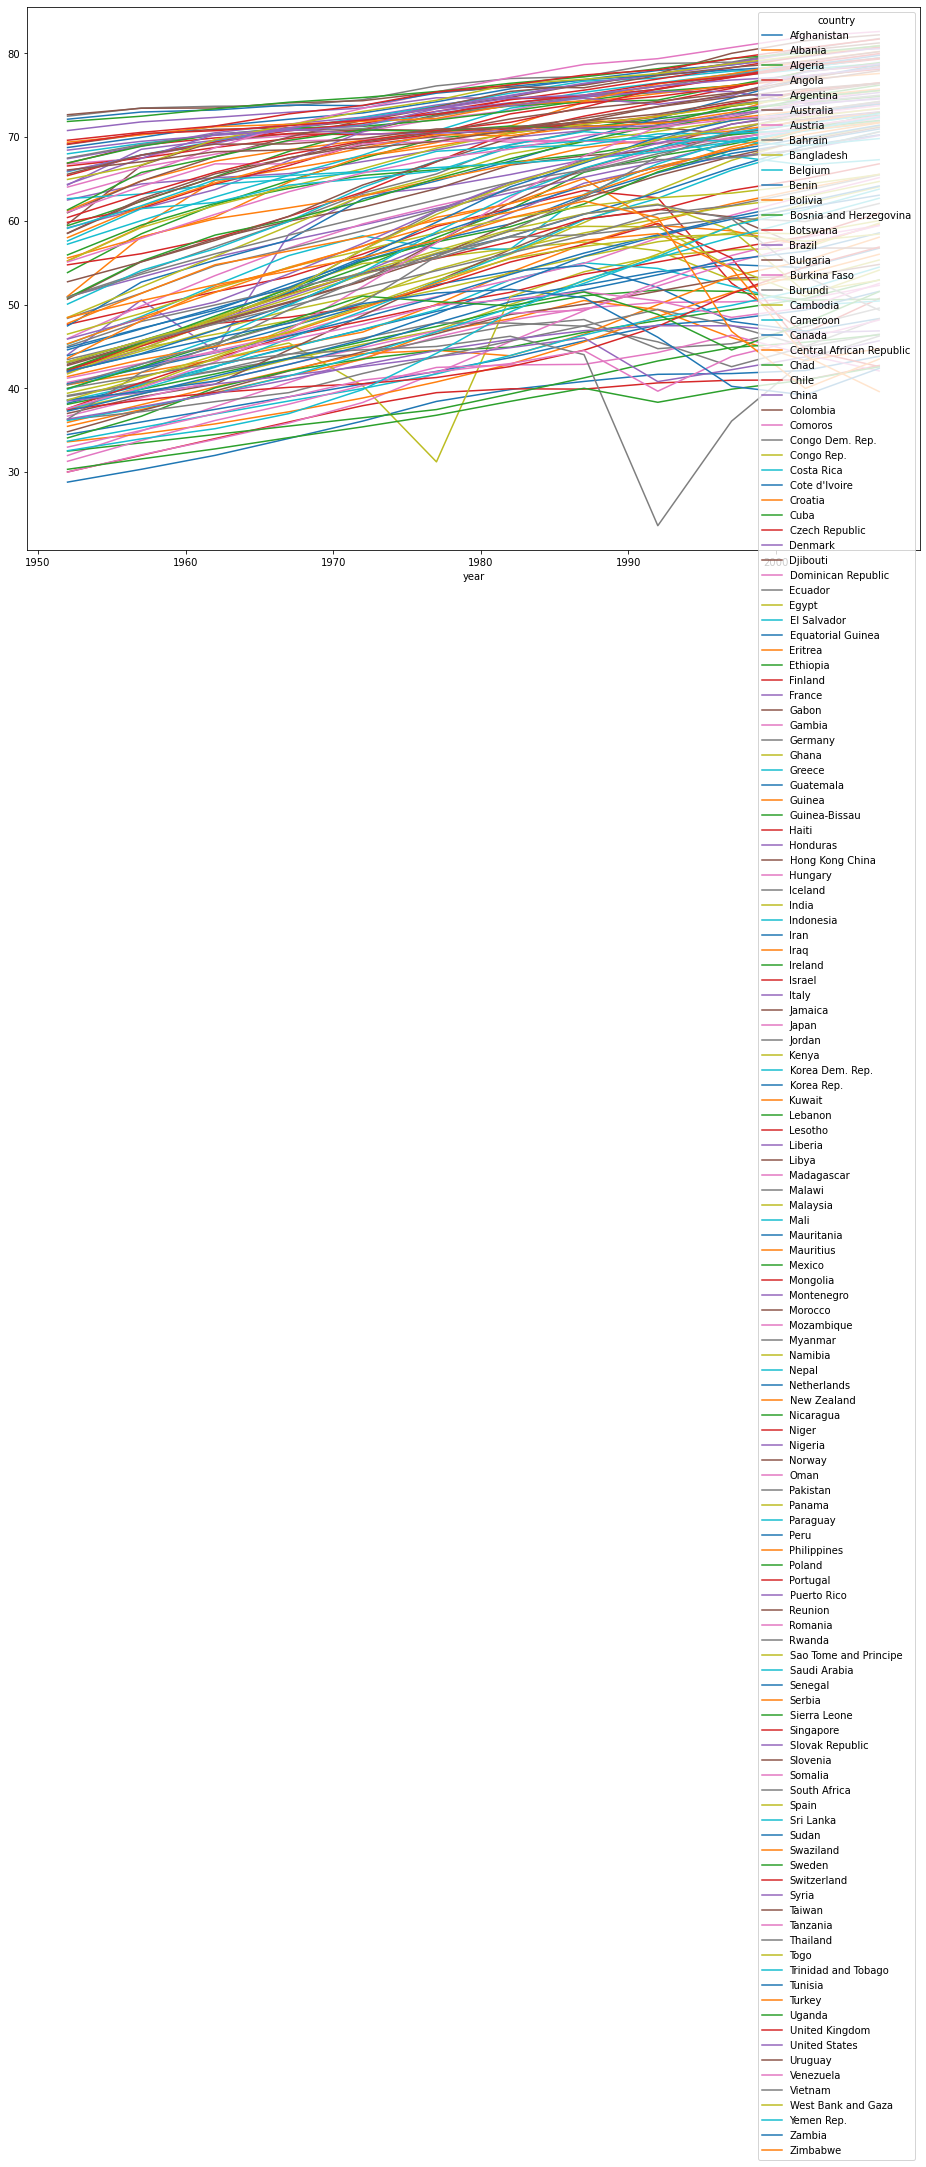

In [21]:
df1.plot(kind='line', figsize=(16,10))
plt.show()

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

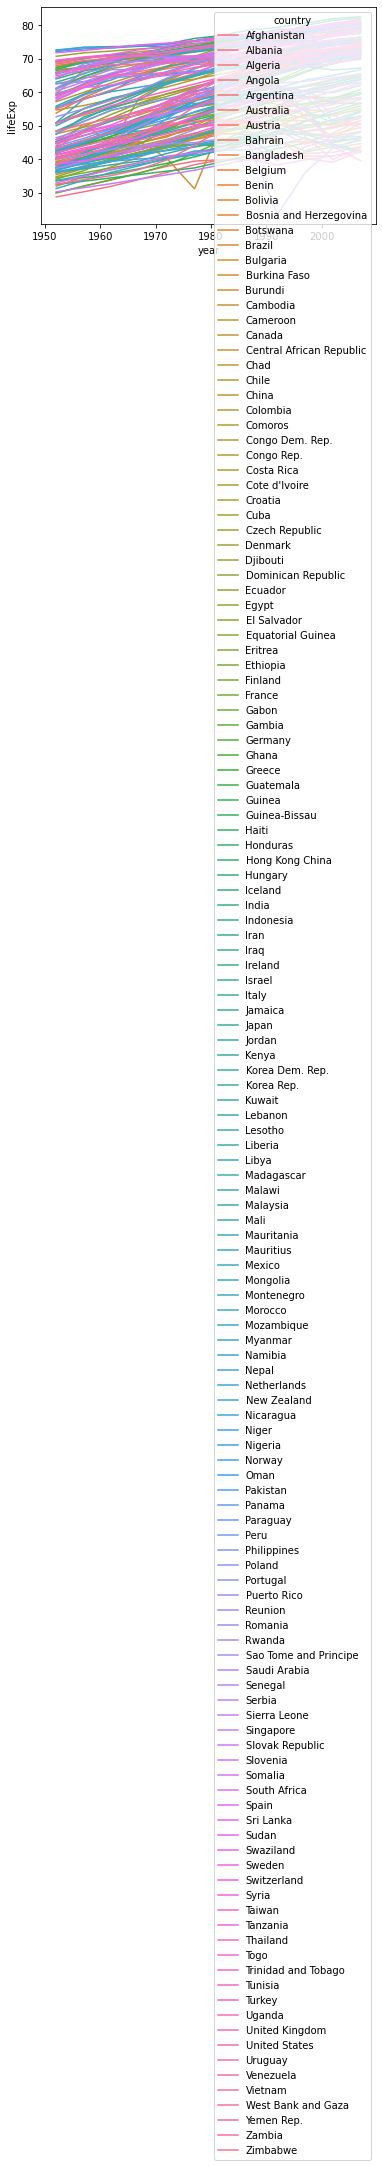

In [17]:
sns.lineplot(data=df, x='year', y='lifeExp', hue='country')

## Pivot Table
We are going to try to answer a question about the **average life expectancy in each continent**. Right now our data is in long format, which is semi-tidy. However, we want each column to be its own variable. To answer our question, we have 6 variables:
- Year
- Africa Life Expectancy
- Americas Life Expectancy
- Asia Life Expectancy
- Europe Life Expectancy
- Oceania Life Expectancy

In order to answer our question, we need to make our DataFrame tidy. Let's pivot our data using `year` and the `index`, `continent` for the `columns` and `lifeExp` for the `values`.

In [63]:
continents = df.pivot_table(index='year', columns='continent', values='lifeExp')
continents

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.2550
1957,41.266346,55.96028,49.318544,66.703067,70.2950
1962,43.319442,58.39876,51.563223,68.539233,71.0850
1967,45.334538,60.41092,54.663640,69.737600,71.3100
1972,47.450942,62.39492,57.319269,70.775033,71.9100
1977,49.580423,64.39156,59.610556,71.937767,72.8550
1982,51.592865,66.22884,62.617939,72.806400,74.2900
1987,53.344788,68.09072,64.851182,73.642167,75.3200
1992,53.629577,69.56836,66.537212,74.440100,76.9450


Now we can easily plot using pandas!

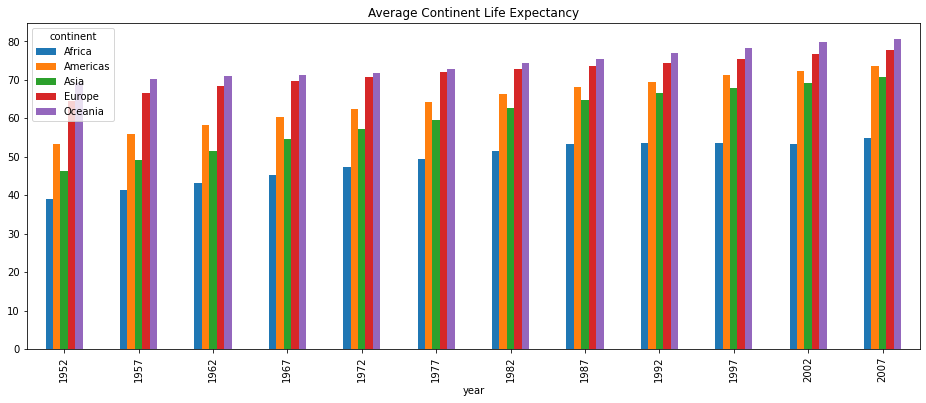

In [46]:
continents.plot(kind='bar', figsize=(16,6))
plt.title('Average Continent Life Expectancy')
plt.show()

Using a pivot table like this is identical to using `groupby()`! Let's group by `continent` and `year` to find the `mean` of each continent/year combination. Use `reset_index` so we dont have to mess with multiple indices.

In [54]:
df2 = df.groupby(['continent', 'year']).mean().reset_index()
df2

,continent,year,pop,lifeExp,gdpPercap
0,Africa,1952,4.570010e+06,39.135500,1252.572466
1,Africa,1957,5.093033e+06,41.266346,1385.236062
2,Africa,1962,5.702247e+06,43.319442,1598.078825
3,Africa,1967,6.447875e+06,45.334538,2050.363801
4,Africa,1972,7.305376e+06,47.450942,2339.615674
5,Africa,1977,8.328097e+06,49.580423,2585.938508
6,Africa,1982,9.602857e+06,51.592865,2481.592960
7,Africa,1987,1.105450e+07,53.344788,2282.668991
8,Africa,1992,1.267464e+07,53.629577,2281.810333
9,Africa,1997,1.430448e+07,53.598269,2378.759555


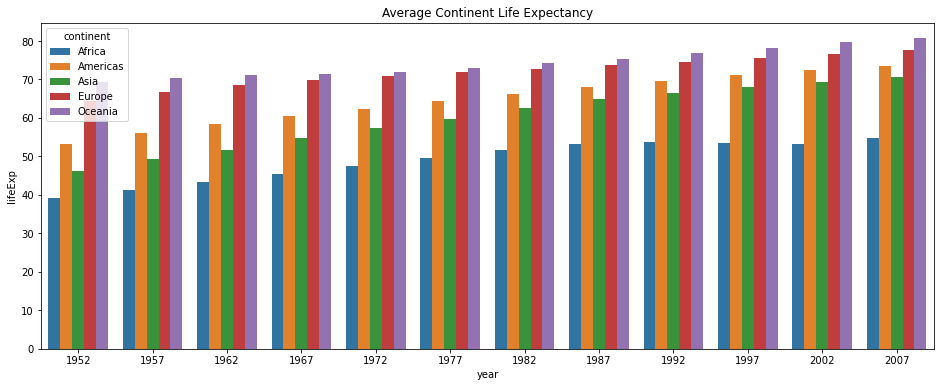

In [60]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df2, x='year', y='lifeExp', hue='continent')
plt.title('Average Continent Life Expectancy')
plt.show()